In [178]:
import pyforest
import sys
sys.path.append('/Users/jayceepang/msse/ATOM_CODE/UTILS/')
from matplotlib.lines import Line2D

In [189]:
og_neks = ['NEK2_binding','NEK2_inhibition','NEK3_binding','NEK5_binding','NEK9_binding','NEK9_inhibition']
samplings =['none_scaled','UNDER','SMOTE','ADASYN'] 
new_neks=['NEK1', 'NEK11', 'NEK2', 'NEK3', 'NEK4', 'NEK5',
       'NEK6', 'NEK9']
og_datapath = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
results_dir='/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/'
gp_results_dir='/Users/jayceepang/msse/ATOM_CODE/examples/holdout/holdout_results/GP/'
datapath = '/Users/jayceepang/msse/ATOM_CODE/datasets/holdout_data/featurized/'
gp_path ='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'

feat_cols_dropped =['NEK','compound_id','base_rdkit_smiles', 'subset', 'active'] 

In [193]:
rf_results=pd.read_csv(f'{results_dir}RF/RF_nanobret_cellular_holdout_results.csv')
gp_results = pd.read_csv(f'{results_dir}GP/GP_nanobret_cellular_holdout_results.csv')
gp_results['RF_type'] = 'GP_matern'
rf_results_cols = set(rf_results.columns)
gp_results_cols = set(gp_results.columns)

print(len(rf_results_cols), len(gp_results_cols))
print(rf_results_cols==gp_results_cols)
print(rf_results_cols-gp_results_cols)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

21 21
True
set()


In [194]:
all_results= pd.concat([rf_results, gp_results])
# all_results.to_csv('holdout/holdout_results/all_nanobret_cellular_holdout_results.csv',index=False)
og_neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding','NEK9_binding', 'NEK9_inhibition'] 
best_rfs = [f'{og_nek}_MFP_none_scaled_BRFC' for og_nek in og_neks]
best_rfs.append('NEK9_inhibition_MFP_none_scaled_BRFC_BCW')
best_gps = [f'{og_nek}_UNDER_GP_matern' for og_nek in og_neks]
selected_prods = best_rfs+best_gps
selected_prods.remove('NEK9_inhibition_MFP_none_scaled_BRFC')
selected_prods

<IPython.core.display.Javascript object>

['NEK2_binding_MFP_none_scaled_BRFC',
 'NEK2_inhibition_MFP_none_scaled_BRFC',
 'NEK3_binding_MFP_none_scaled_BRFC',
 'NEK5_binding_MFP_none_scaled_BRFC',
 'NEK9_binding_MFP_none_scaled_BRFC',
 'NEK9_inhibition_MFP_none_scaled_BRFC_BCW',
 'NEK2_binding_UNDER_GP_matern',
 'NEK2_inhibition_UNDER_GP_matern',
 'NEK3_binding_UNDER_GP_matern',
 'NEK5_binding_UNDER_GP_matern',
 'NEK9_binding_UNDER_GP_matern',
 'NEK9_inhibition_UNDER_GP_matern']

In [195]:
selected_results = all_results[all_results['prod_model'].isin(selected_prods)]


In [196]:
# selected_results.to_csv('holdout/holdout_results/nanobret_cellular_holdout_only_prod_models.csv',index=False)
print(selected_results['modeling_type'].unique())

['RF' 'GP']


In [197]:

selected_results['model'] = selected_results['model'].str.replace('none_scaled', 'Orig', regex=False)
selected_results['prod_model']=selected_results['prod_model'].str.replace('none_scaled', 'Orig')
selected_results['model strategy']=selected_results['model strategy'].str.replace('none_scaled', 'Orig')
# selected_results['model strategy'] =selected_results['model strategy'].replace({'NEK9_inhibition_MFP_Orig_BRFC_BCW',
#                                         'NEK9_inhibition_Orig Bstrp Under RF BalWeight',
#                                         'NEK2_binding_MFP_Orig_BRFC', 'NEK2_binding_Orig Bstrp Under RF'
#                                             'NEK3_binding_MFP_Orig_BRFC', 'NEK3_binding_Orig Bstrp Under RF',
#                                         'NEK5_binding_MFP_Orig_BRFC', 'NEK5_binding_Orig Bstrp Under RF',
#                                         'NEK9_binding_MFP_Orig_BRFC', 'NEK_binding_Orig Bstrp Under RF',
#                                         'NEK2_inhibition_MFP_Orig_BRFC', 'NEK3_inhibition_Orig Bstrp Under RF'
#                                             })

selected_results['prod_model'] = selected_results['prod_model'].replace({
    'NEK9_inhibition_MFP_Orig_BRFC_BCW': 'NEK9_inhibition_Orig Bstrp Under RF BalWeight',
    # 'NEK9_inhibition_Orig Bstrp Under RF BalWeight': 'NEK9 inhibition Orig Bootstrap Under RF BalWeight',
    'NEK2_binding_MFP_Orig_BRFC': 'NEK2_binding_Orig Bstrp Under RF',
    'NEK3_binding_MFP_Orig_BRFC': 'NEK3_binding_Orig Bstrp Under RF',
    'NEK3_binding_Orig Bstrp Under RF': 'NEK3 binding Orig Bootstrap Under RF',
    'NEK5_binding_MFP_Orig_BRFC': 'NEK5_binding_Orig Bstrp Under RF',
    'NEK9_binding_MFP_Orig_BRFC': 'NEK_binding_Orig Bstrp Under RF',
    'NEK2_inhibition_MFP_Orig_BRFC': 'NEK3_inhibition_Orig Bstrp Under RF'})
selected_results['model strategy_old'] = selected_results['model strategy']

# selected_results['model strategy'] =selected_results['prod_model'].str.split('_').str[2:].str.join('_')
selected_results

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/2923281544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_results['model'] = selected_results['model'].str.replace('none_scaled', 'Orig', regex=False)
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/2923281544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_results['prod_model']=selected_results['prod_model'].str.replace('none_scaled', 'Orig')
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykerne

,model,prod_model,data NEK,NEK,model NEK,strategy,feat_type,RF_type,cm,recall,...,precision,f1,ROC_AUC,MCC,balanced_accuracy,1-specificity,model strategy,modeling_type,set,model strategy_old
2,NEK1_NEK2_binding_MFP_Orig_BRFC,NEK2_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK2_binding,none_scaled,MFP,BRFC,"[134, 236, 5, 25]",0.833333,...,0.095785,0.171821,0.597748,0.108136,0.597748,0.637838,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
18,NEK1_NEK2_inhibition_MFP_Orig_BRFC,NEK3_inhibition_Orig Bstrp Under RF,NEK1,NEK1,NEK2_inhibition,none_scaled,MFP,BRFC,"[136, 234, 2, 28]",0.933333,...,0.106870,0.191781,0.650450,0.166723,0.650450,0.632432,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
34,NEK1_NEK3_binding_MFP_Orig_BRFC,NEK3_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK3_binding,none_scaled,MFP,BRFC,"[178, 192, 2, 28]",0.933333,...,0.127273,0.224000,0.707207,0.219406,0.707207,0.518919,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
50,NEK1_NEK5_binding_MFP_Orig_BRFC,NEK5_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK5_binding,none_scaled,MFP,BRFC,"[185, 185, 6, 24]",0.800000,...,0.114833,0.200837,0.650000,0.158195,0.650000,0.500000,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
66,NEK1_NEK9_binding_MFP_Orig_BRFC,NEK_binding_Orig Bstrp Under RF,NEK1,NEK1,NEK9_binding,none_scaled,MFP,BRFC,"[154, 216, 0, 30]",1.000000,...,0.121951,0.217391,0.708108,0.225296,0.708108,0.583784,Orig_BRFC,RF,nanobret_cellular_holdout,Orig_BRFC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NEK9_NEK2_inhibition_MFP_UNDER_GP_matern,NEK2_inhibition_UNDER_GP_matern,NEK9,NEK9,NEK2_inhibition,UNDER,MFP,GP_matern,"[137, 229, 4, 30]",0.882353,...,0.115830,0.204778,0.628335,0.149829,0.628335,0.625683,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern
177,NEK9_NEK3_binding_MFP_UNDER_GP_matern,NEK3_binding_UNDER_GP_matern,NEK9,NEK9,NEK3_binding,UNDER,MFP,GP_matern,"[187, 179, 4, 30]",0.882353,...,0.143541,0.246914,0.696641,0.219581,0.696641,0.489071,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern
181,NEK9_NEK5_binding_MFP_UNDER_GP_matern,NEK5_binding_UNDER_GP_matern,NEK9,NEK9,NEK5_binding,UNDER,MFP,GP_matern,"[174, 192, 0, 34]",1.000000,...,0.150442,0.261538,0.737705,0.267436,0.737705,0.524590,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern
185,NEK9_NEK9_binding_MFP_UNDER_GP_matern,NEK9_binding_UNDER_GP_matern,NEK9,NEK9,NEK9_binding,UNDER,MFP,GP_matern,"[150, 216, 0, 34]",1.000000,...,0.136000,0.239437,0.704918,0.236088,0.704918,0.590164,UNDER_GP_matern,GP,nanobret_cellular_holdout,UNDER_GP_matern


In [198]:
# produ results
orig_results = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/prod_best_GP_best_RF.csv')
orig_results['model'] = orig_results['model'].replace('MFP_UNDER_matern', 'UNDER_GP_matern')

orig_results['model'] = orig_results['NEK'].astype(str)+'_'+orig_results['strategy'] 
orig_results=orig_results.rename(columns={'model': 'prod_model', 'NEK': 'data NEK'
                                         ,'model version':'model strategy_old'})

holdout_df_cols = ['model', 'data NEK', 'prod_model', 'model NEK', 'model version',
       'model strategy', 'feat_type', 'cm', 'recall', 'specificity',
       'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC', 'balanced_accuracy',
       'set', 'modeling_type', 'model strategy_old', '1-specificity']

orig_cols =['prod_model', 'data NEK', 'strategy', 'feat_type', 'cm', 'recall',
       'specificity', 'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC',
       'balanced_accuracy', 'modeling_type', 'set', '1-specificity',
       'nek type', 'model version', 'RF_type', 'model name', 'active ratio',
       'model', 'model NEK'] 
orig_results['model NEK'] = orig_results['data NEK'] 
extra_cols_to_drop = ['active ratio', 'RF_type', 'model name', 'nek type']
orig_results = orig_results.drop(columns=extra_cols_to_drop)
rf_prod_results = orig_results[(orig_results['strategy']=='Orig Bstrp Under RF')|
                            (orig_results['strategy']=='Orig Bstrp Under RF BalWeight')]


gp_prod_results = orig_results[orig_results['strategy']=='UNDER_GP_matern']
rf_prod_results
print(orig_results.columns)

<IPython.core.display.Javascript object>

Index(['prod_model', 'data NEK', 'strategy', 'feat_type', 'cm', 'recall',
       'specificity', 'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC',
       'balanced_accuracy', 'modeling_type', 'set', '1-specificity',
       'model strategy_old', 'model NEK'],
      dtype='object')


NEK2_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/953009924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

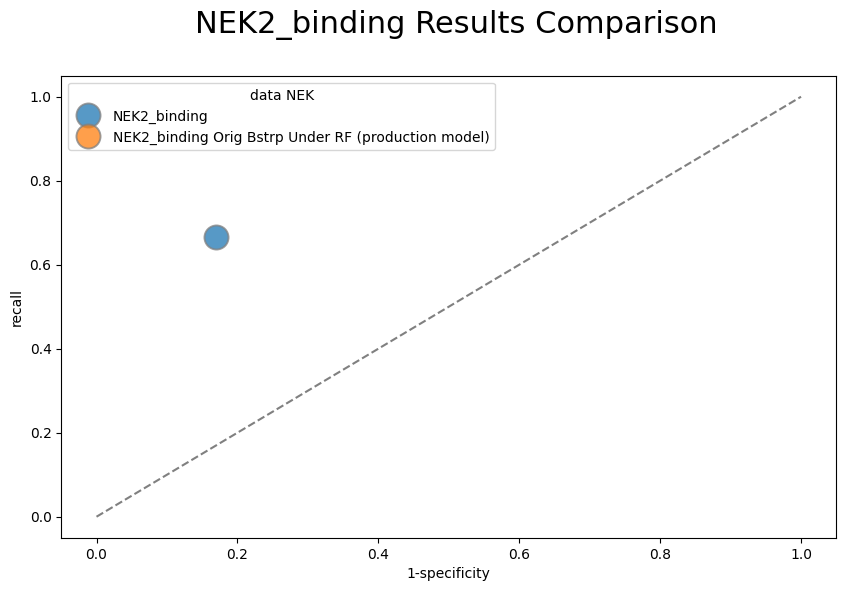

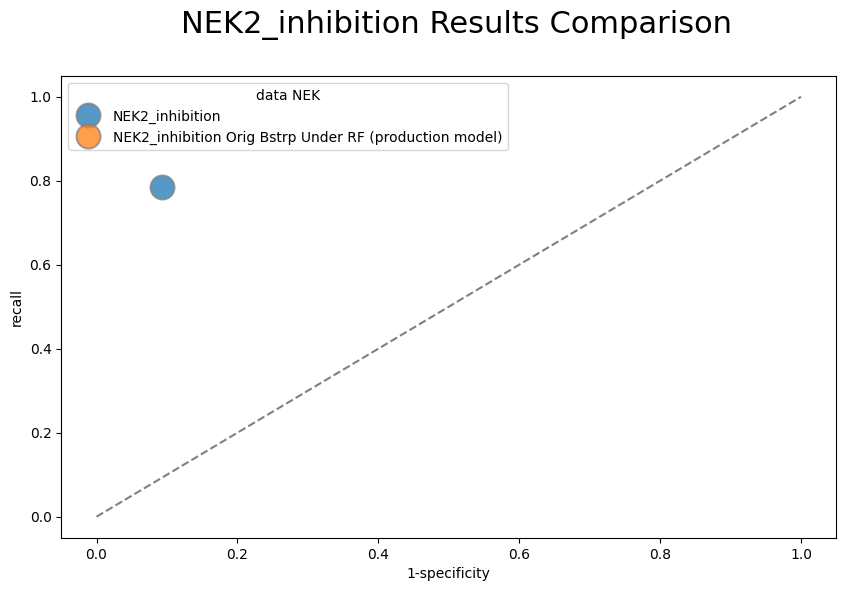

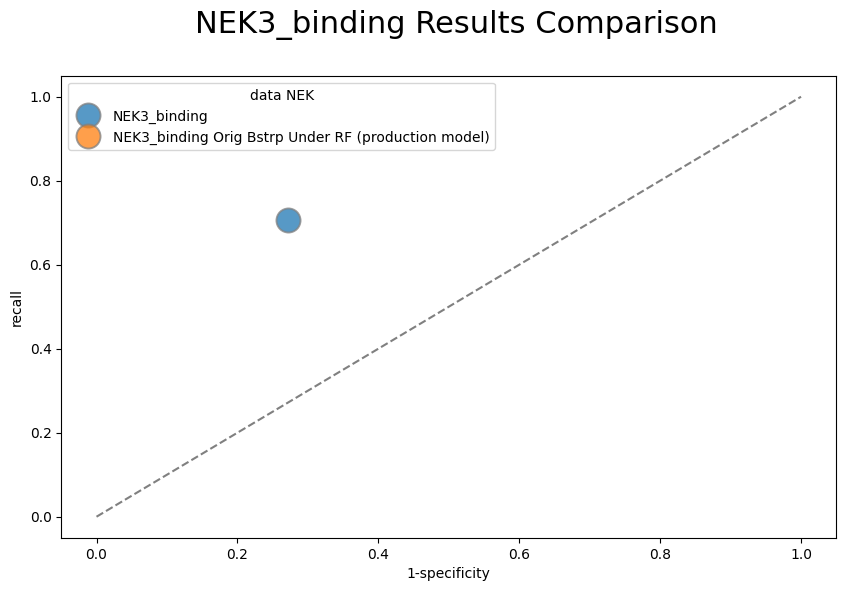

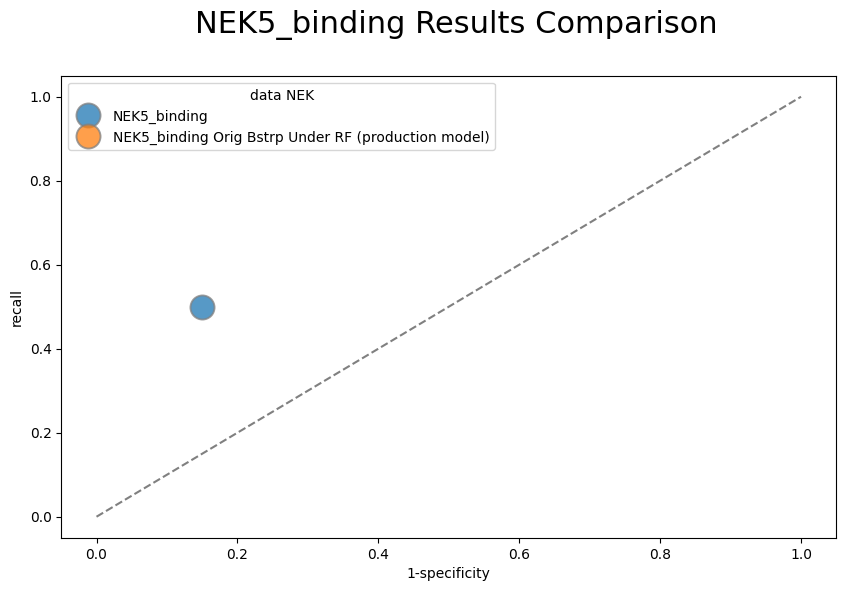

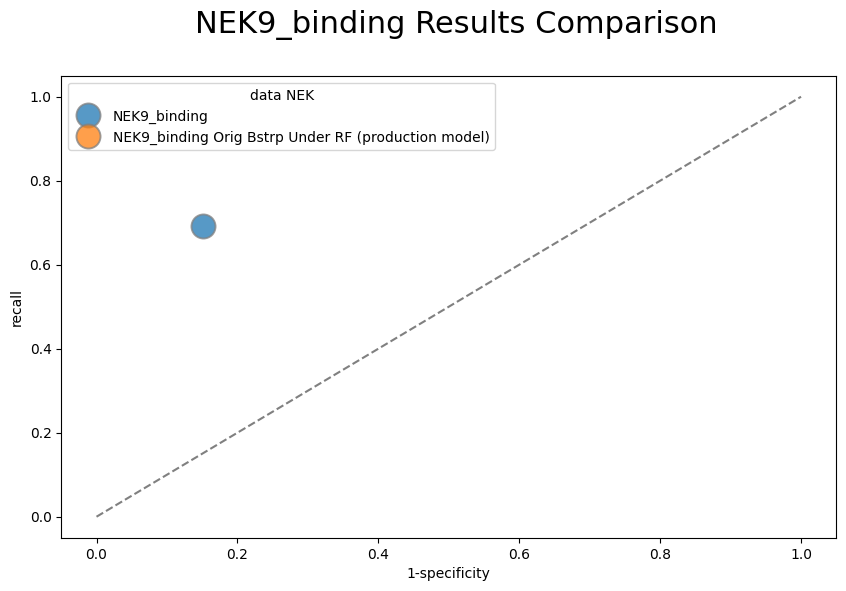

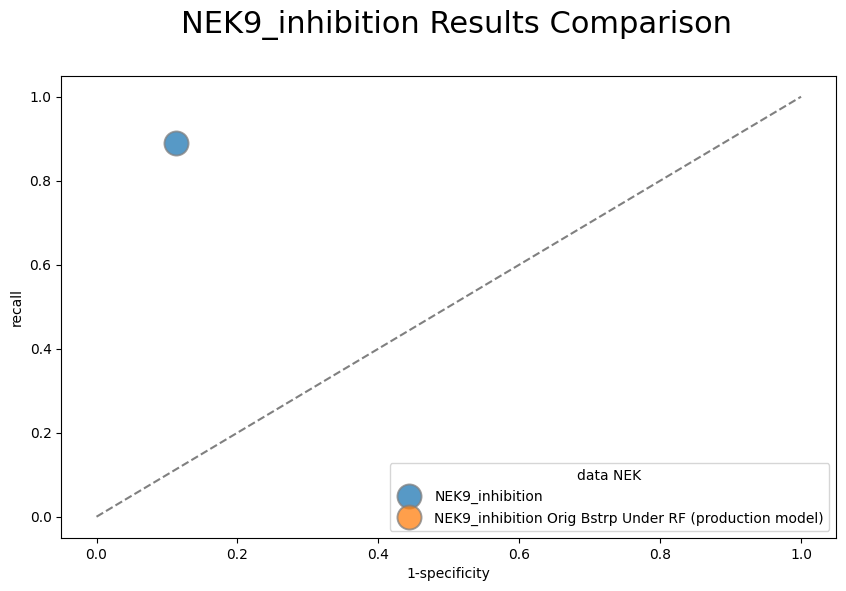

In [200]:

for nek in rf_prod_results['model NEK'].unique():
    print(nek)
    fig, axs = plt.subplots(figsize=(10,6))
    plt.suptitle(f'{nek} Results Comparison',fontsize=22, x=0.52, y=0.99)
    # plotting_df = selected_results[selected_results['model NEK']==nek] 
    
    strategy = rf_prod_results['strategy'].values[0]
    prod_result= rf_prod_results[rf_prod_results['model NEK']==nek] 
    prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'
    
    new_results = selected_results[(selected_results['model strategy']==strategy) 
                & (selected_results['model NEK']==nek)]
    plotting_df = pd.concat([new_results, prod_result], ignore_index=True)

    

    sns.scatterplot(data=plotting_df, x='1-specificity', y='recall', hue='data NEK'
                   ,edgecolor='gray',alpha=0.75,s=300 )
    plt.plot([-0,1], [0, 1], linestyle='--', color='gray')
    plt.savefig(f'comparison_figs/{nek}_{strategy}.png',bbox_inches='tight')

NEK2_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_16477/3209743640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

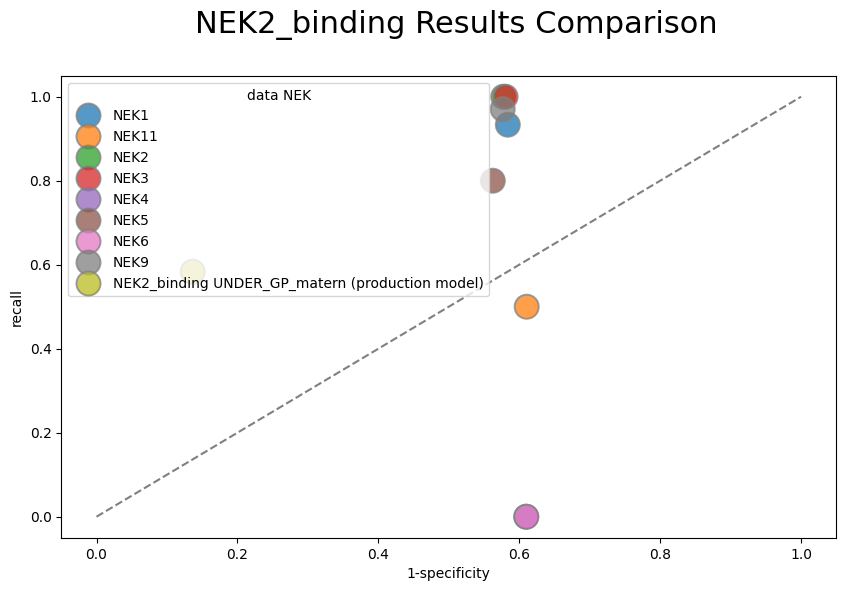

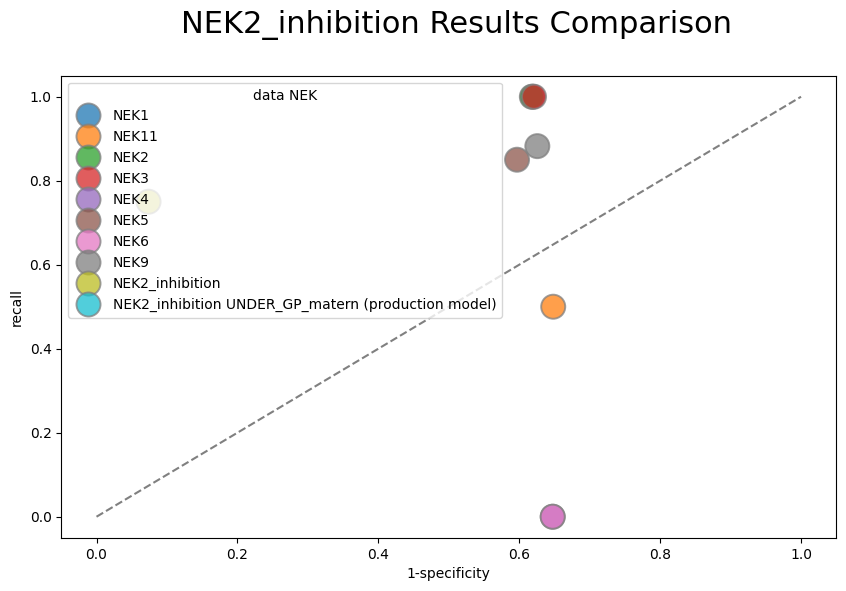

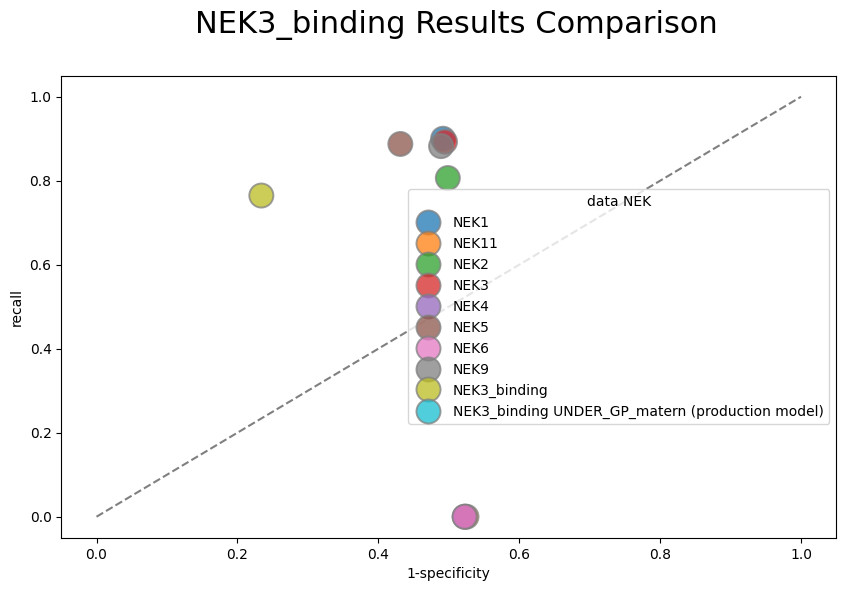

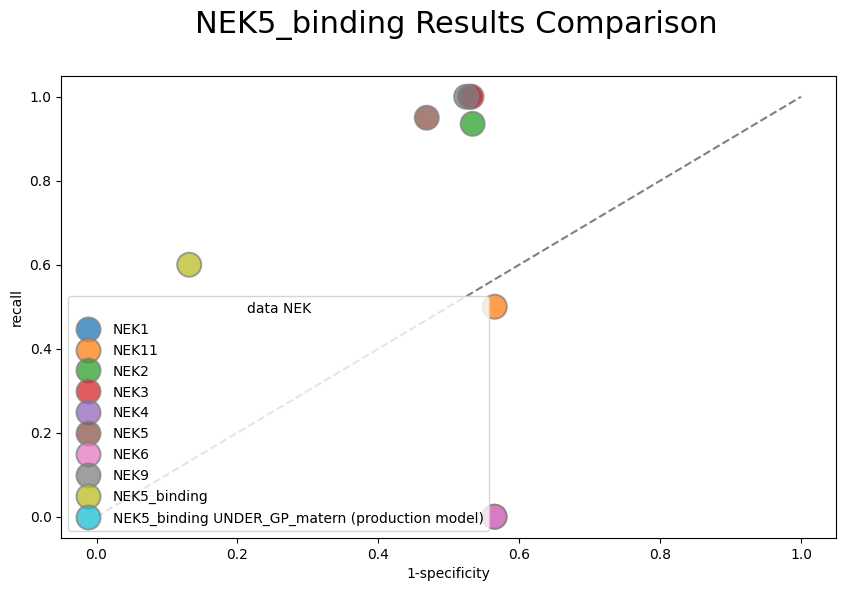

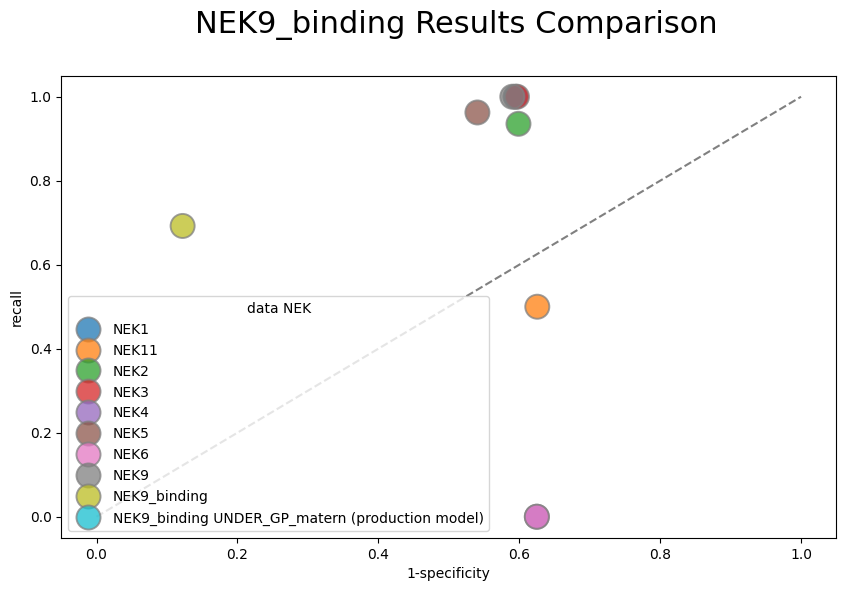

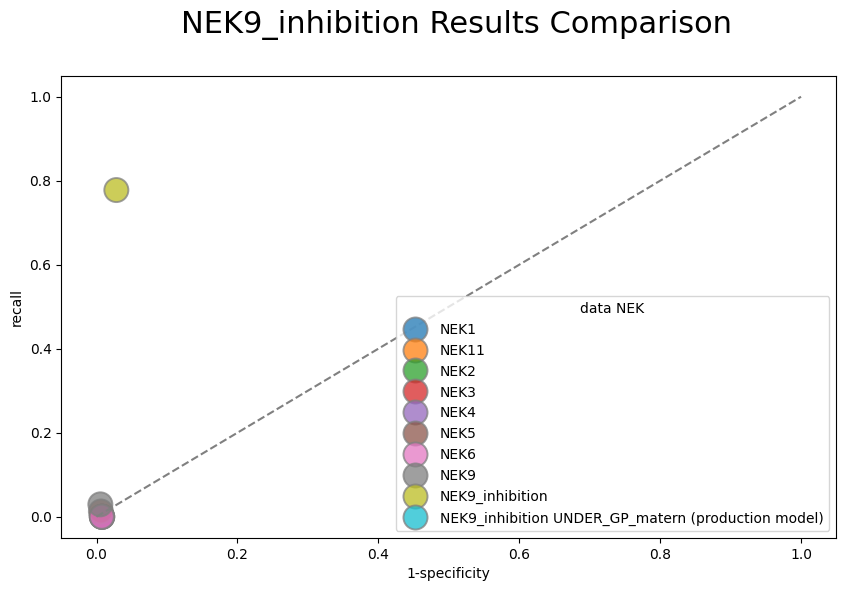

In [201]:

for nek in gp_prod_results['model NEK'].unique():
    print(nek)
    fig, axs = plt.subplots(figsize=(10,6))
    plt.suptitle(f'{nek} Results Comparison',fontsize=22, x=0.52, y=0.99)
    
    strategy = gp_prod_results['strategy'].values[0]
    prod_result= gp_prod_results[gp_prod_results['model NEK']==nek] 
    prod_result.at[0,'data NEK'] = f'{nek} {strategy} (production model)'
    
    new_results = selected_results[(selected_results['model strategy']==strategy) 
                & (selected_results['model NEK']==nek)]
    plotting_df = pd.concat([new_results, prod_result], ignore_index=True)

    

    sns.scatterplot(data=plotting_df, x='1-specificity', y='recall', hue='data NEK'
                   ,edgecolor='gray',alpha=0.75,s=300 )
    plt.plot([-0,1], [0, 1], linestyle='--', color='gray')
    plt.savefig(f'comparison_figs/{nek}_{strategy}.png',bbox_inches='tight')

In [205]:
selected_results['prod_model'].value_counts()

prod_model
NEK2_binding_Orig Bstrp Under RF                 8
NEK3_inhibition_Orig Bstrp Under RF              8
NEK3_binding_Orig Bstrp Under RF                 8
NEK5_binding_Orig Bstrp Under RF                 8
NEK_binding_Orig Bstrp Under RF                  8
NEK9_inhibition_Orig Bstrp Under RF BalWeight    8
NEK2_binding_UNDER_GP_matern                     8
NEK2_inhibition_UNDER_GP_matern                  8
NEK3_binding_UNDER_GP_matern                     8
NEK5_binding_UNDER_GP_matern                     8
NEK9_binding_UNDER_GP_matern                     8
NEK9_inhibition_UNDER_GP_matern                  8
Name: count, dtype: int64

In [204]:
rf_prod_results

,prod_model,data NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set,1-specificity,model strategy_old,model NEK
1,NEK2_binding_Orig Bstrp Under RF,NEK2_binding,Orig Bstrp Under RF,MFP,"[225, 46, 4, 8]",0.666667,0.830258,0.823322,0.148148,0.242424,0.748462,0.254831,0.748462,RF,prod,0.169742,BRFC,NEK2_binding
3,NEK2_inhibition_Orig Bstrp Under RF,NEK2_inhibition,Orig Bstrp Under RF,MFP,"[344, 35, 6, 22]",0.785714,0.907652,0.899263,0.385965,0.517647,0.846683,0.505696,0.846683,RF,prod,0.092348,BRFC,NEK2_inhibition
5,NEK3_binding_Orig Bstrp Under RF,NEK3_binding,Orig Bstrp Under RF,MFP,"[193, 72, 5, 12]",0.705882,0.728302,0.726950,0.142857,0.237624,0.717092,0.225969,0.717092,RF,prod,0.271698,BRFC,NEK3_binding
7,NEK5_binding_Orig Bstrp Under RF,NEK5_binding,Orig Bstrp Under RF,MFP,"[194, 34, 10, 10]",0.500000,0.850877,0.822581,0.227273,0.312500,0.675439,0.250090,0.675439,RF,prod,0.149123,BRFC,NEK5_binding
9,NEK9_binding_Orig Bstrp Under RF,NEK9_binding,Orig Bstrp Under RF,MFP,"[229, 41, 4, 9]",0.692308,0.848148,0.840989,0.180000,0.285714,0.770228,0.296654,0.770228,RF,prod,0.151852,BRFC,NEK9_binding
11,NEK9_inhibition_Orig Bstrp Under RF BalWeight,NEK9_inhibition,Orig Bstrp Under RF BalWeight,MFP,"[63, 8, 1, 8]",0.888889,0.887324,0.887500,0.500000,0.640000,0.888106,0.613171,0.888106,RF,prod,0.112676,BRFC_BCW,NEK9_inhibition


In [208]:
rf_prod_results.columns

Index(['prod_model', 'data NEK', 'strategy', 'feat_type', 'cm', 'recall',
       'specificity', 'accuracy', 'precision', 'f1', 'ROC_AUC', 'MCC',
       'balanced_accuracy', 'modeling_type', 'set', '1-specificity',
       'model strategy_old', 'model NEK'],
      dtype='object')

In [216]:
rf_prod_results

,prod_model,data NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set,1-specificity,model strategy_old,model NEK
1,NEK2_binding_Orig Bstrp Under RF,NEK2_binding,Orig Bstrp Under RF,MFP,"[225, 46, 4, 8]",0.666667,0.830258,0.823322,0.148148,0.242424,0.748462,0.254831,0.748462,RF,prod,0.169742,BRFC,NEK2_binding
3,NEK2_inhibition_Orig Bstrp Under RF,NEK2_inhibition,Orig Bstrp Under RF,MFP,"[344, 35, 6, 22]",0.785714,0.907652,0.899263,0.385965,0.517647,0.846683,0.505696,0.846683,RF,prod,0.092348,BRFC,NEK2_inhibition
5,NEK3_binding_Orig Bstrp Under RF,NEK3_binding,Orig Bstrp Under RF,MFP,"[193, 72, 5, 12]",0.705882,0.728302,0.726950,0.142857,0.237624,0.717092,0.225969,0.717092,RF,prod,0.271698,BRFC,NEK3_binding
7,NEK5_binding_Orig Bstrp Under RF,NEK5_binding,Orig Bstrp Under RF,MFP,"[194, 34, 10, 10]",0.500000,0.850877,0.822581,0.227273,0.312500,0.675439,0.250090,0.675439,RF,prod,0.149123,BRFC,NEK5_binding
9,NEK9_binding_Orig Bstrp Under RF,NEK9_binding,Orig Bstrp Under RF,MFP,"[229, 41, 4, 9]",0.692308,0.848148,0.840989,0.180000,0.285714,0.770228,0.296654,0.770228,RF,prod,0.151852,BRFC,NEK9_binding
11,NEK9_inhibition_Orig Bstrp Under RF BalWeight,NEK9_inhibition,Orig Bstrp Under RF BalWeight,MFP,"[63, 8, 1, 8]",0.888889,0.887324,0.887500,0.500000,0.640000,0.888106,0.613171,0.888106,RF,prod,0.112676,BRFC_BCW,NEK9_inhibition


NEK2_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK2_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK3_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK5_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_binding


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NEK9_inhibition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

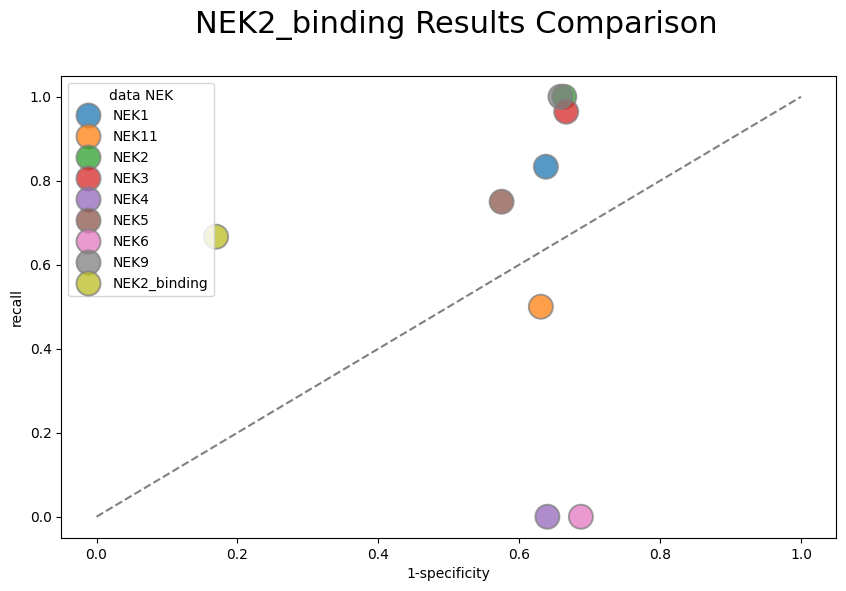

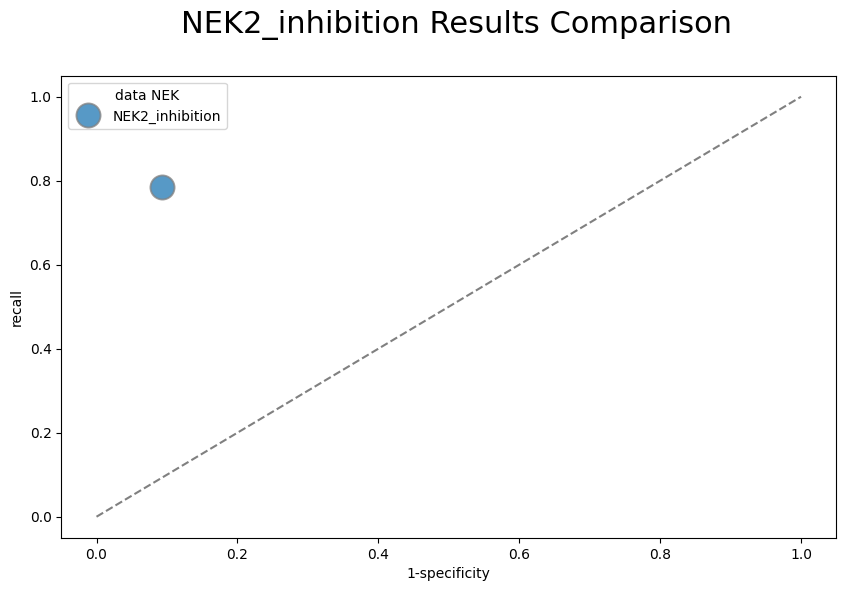

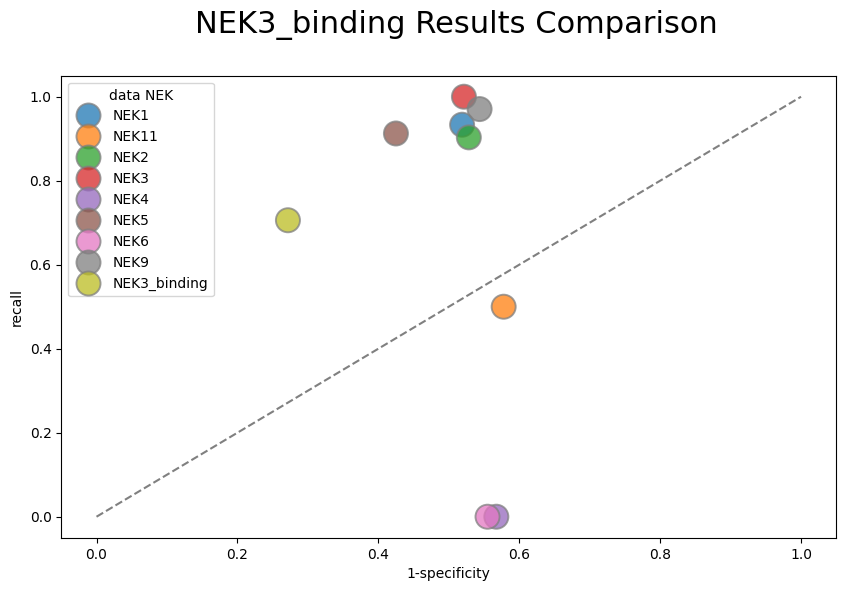

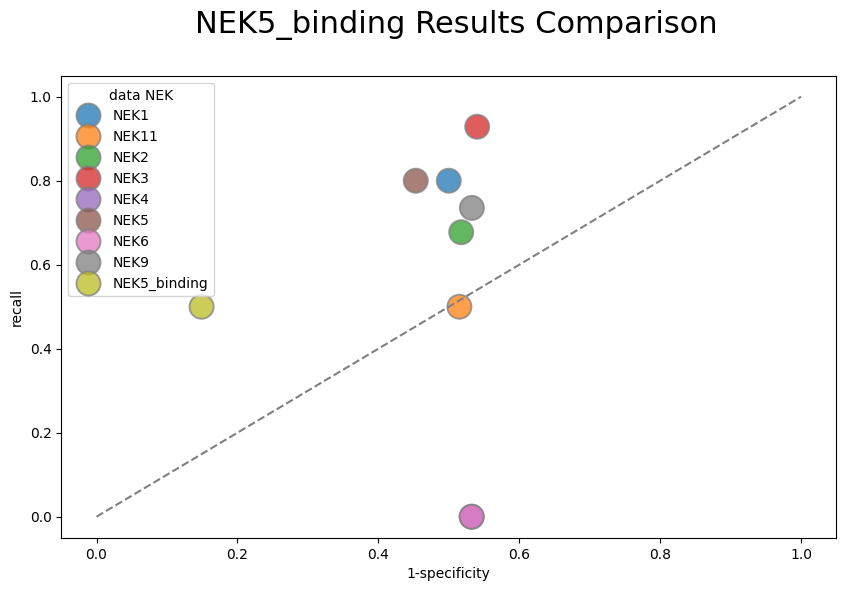

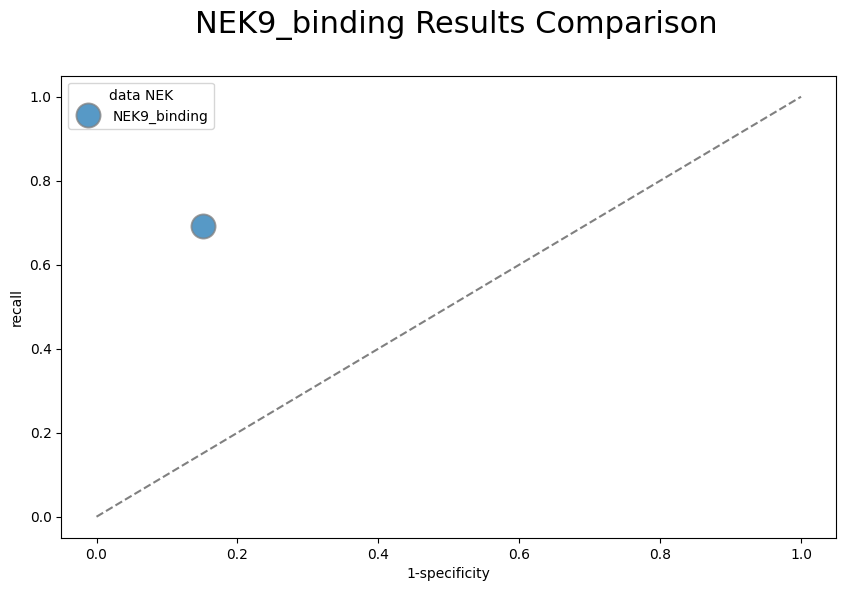

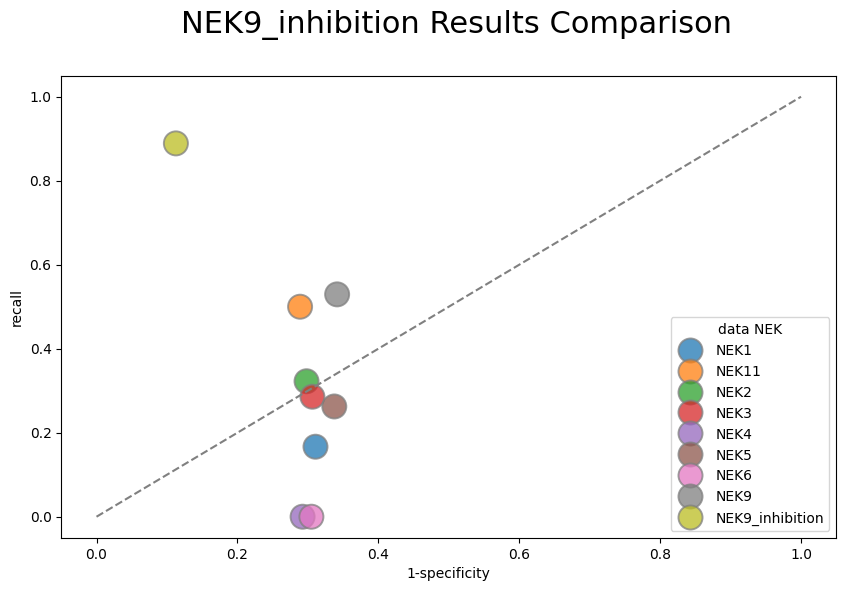

In [218]:
simple_cols =['prod_model', 'data NEK', 'strategy', 'recall', '1-specificity'] 
for nek in rf_prod_results['model NEK'].unique():
    print(nek)
    fig, axs = plt.subplots(figsize=(10,6))
    plt.suptitle(f'{nek} Results Comparison',fontsize=22, x=0.52, y=0.99)
    

    prod_result= rf_prod_results[rf_prod_results['model NEK']==nek][simple_cols]

    prod_model_name = prod_result['prod_model'].values[0]
    
    new_results = selected_results[(selected_results['model strategy']==strategy) 
                & (selected_results['model NEK']==nek)]
    new_results = selected_results[selected_results['prod_model']== prod_model_name][simple_cols]
    plotting_df = pd.concat([new_results, prod_result], ignore_index=True)



    sns.scatterplot(data=plotting_df, x='1-specificity', y='recall', hue='data NEK'
                   ,edgecolor='gray',alpha=0.75,s=300 )
    plt.plot([-0,1], [0, 1], linestyle='--', color='gray')
    plt.savefig(f'comparison_figs/{nek}_{strategy}.png',bbox_inches='tight')